In [926]:
import os
import scipy as sp
from postProcessing.importData import *


#Insert name here
NAME = "64cl_u_s3.h5" 
# first type 64cl_u_s1
# second type 64cl_u_s3
#################
NAME = NAME.split("/")
if 'simulations' in NAME:
    NAME.remove("simulations")
    NAME="/".join(NAME)
if isinstance(NAME, list):
    NAME = "/".join(NAME)
NAME = NAME.split(".")
if "h5" in NAME:
    NAME.remove("h5")
    NAME=".".join(NAME)
if isinstance(NAME, list):
    NAME = ".".join(NAME)
    

PATH = "./simulations/" + NAME
if(os.path.isdir(NAME)):
    print("Enter a valid file name")
else:
    PATH += ".h5"
    data_0 = dataProcessing(PATH)
data_0.printHamiltonian()



b'float'
SELF CONSISTENT [GAUGE, HARTREE]  ==> [True, False]
The current simulation does not export HoppingFields
Note: Magnetic free energy density not added to free energy density because defined on plaquettes
COMMON VARIABLES:
T    ==>  0.26431718468666077
q    ==>  0.699999988079071
Bext ==>  (0., 0., 0.)
Emax ==>  21.020000457763672
[Component 1, Component 2]
t_x  ==>  [1.+0.j 1.+0.j]
t_y  ==>  [1.+0.j 1.+0.j]
mu   ==>  [0. 0.]
h    ==>  [0. 0.]
Coupling matrix V:
 2.5  0.01  
0.01   2.2  
Inverse of V:
   0.400007  -0.00181821  
-0.00181821     0.454554  
detV ==> 5.49990011921376


In [939]:
NAME = "64cl_sv_LV_11.h5" #11-vortex case 6422JO-1.70c12-1.h5 ; 7-vortex case #4822W-1, 11-vortex case 6422JO-1.70c19-1.h5 ; 4822J1, 4822J, 4822JL-1, 4822JL-10, 64MJO-1.70c19.h5
# first type - 64cl_v, 64cl_11, 64_cl_18, 64cl_LV, 64cl_LV18
# second type - 64cl_v_s3, 64cl_s_18, 64cl_s_11, 64cl_s_7, 64cl_s_3, 64cl_s_3-1, 64cl_s_3-1-1
# third type - 64cl_sv_2-2, 64cl_sv_18, 64cl_sv_11, 64cl_sv_7, 64cl_sv_LV_11, 64cl_sv_LV_5
# fourth type 64cl_sv_4
NAME = NAME.split("/")
if 'simulations' in NAME:
    NAME.remove("simulations")
    NAME="/".join(NAME)
if isinstance(NAME, list):
    NAME = "/".join(NAME)
NAME = NAME.split(".")
if "h5" in NAME:
    NAME.remove("h5")
    NAME=".".join(NAME)
if isinstance(NAME, list):
    NAME = ".".join(NAME)
    

PATH = "./simulations/" + NAME
if(os.path.isdir(NAME)):
    print("Enter a valid file name")
else:
    PATH += ".h5"
    data = dataProcessing(PATH)
data.printHamiltonian()

b'float'
SELF CONSISTENT [GAUGE, HARTREE]  ==> [True, False]
The current simulation does not export HoppingFields
Note: Magnetic free energy density not added to free energy density because defined on plaquettes
COMMON VARIABLES:
T    ==>  0.26431718468666077
q    ==>  0.800000011920929
Bext ==>  (0., 0., 0.)
Emax ==>  21.020000457763672
[Component 1, Component 2]
t_x  ==>  [1.+0.j 1.+0.j]
t_y  ==>  [1.+0.j 1.+0.j]
mu   ==>  [0. 0.]
h    ==>  [0. 0.]
Coupling matrix V:
 2.5  0.01  
0.01   2.2  
Inverse of V:
   0.400007  -0.00181821  
-0.00181821     0.454554  
detV ==> 5.49990011921376


In [940]:
file_name = NAME

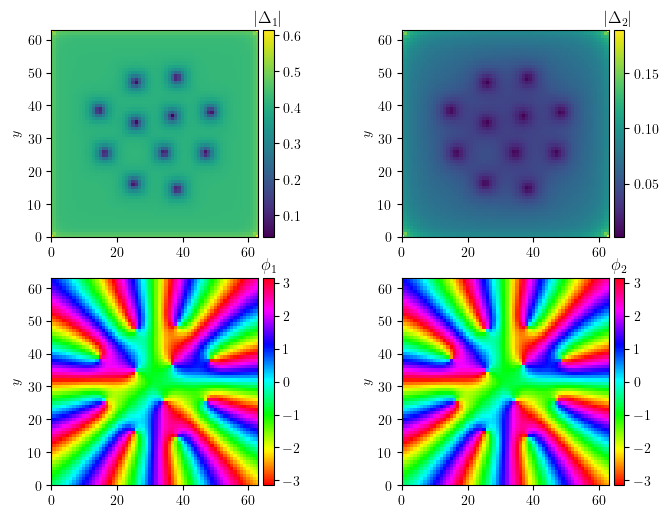

In [941]:
data.plotDelta22(save='images/' + file_name+'delta')

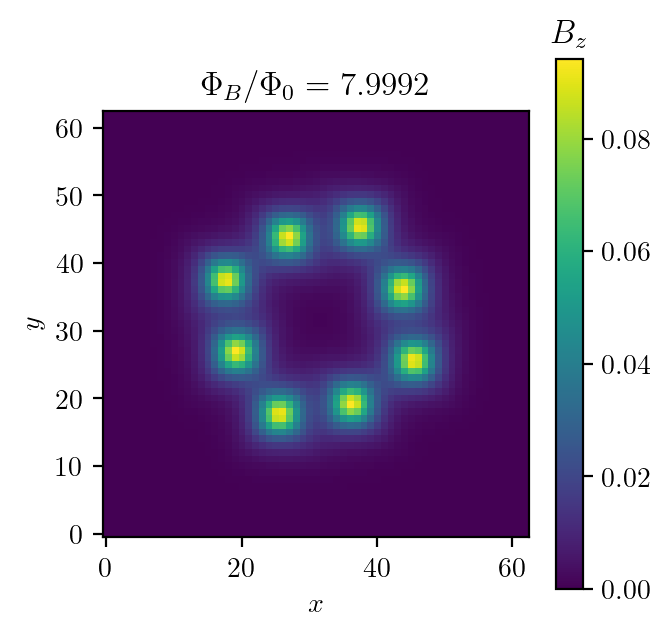

In [930]:
data.plotB(save='images/' + file_name+'B')

In [847]:
np.min((data.B))

-3.129243850708008e-07

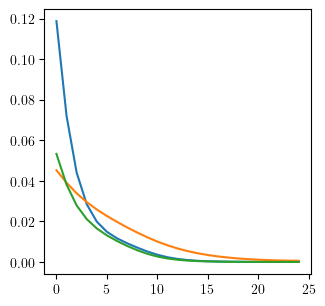

In [848]:
edge = 2
cp = 37
row = 34
plt.plot((np.abs(data_0.D_1) - np.abs(data.D_1))[row, cp:-edge])
plt.plot((np.abs(data_0.D_2) - np.abs(data.D_2))[row, cp:-edge])
plt.plot((np.abs(data.B))[row, cp:-edge+1])

In [849]:
d_1 = (np.abs(data_0.D_1) - np.abs(data.D_1))[row, cp:-edge]
d_2 = (np.abs(data_0.D_2) - np.abs(data.D_2))[row, cp:-edge]
f_b = (np.abs(data.B))[row, cp:-edge+1]

In [820]:
def fit_f(x, a1, c1, a2, c2):
    return a1 * np.exp(-c1 * x) + a2 * np.exp(-c2 * x)

In [821]:
def cost_function(args, x1, y1, x2, y2):
    a1, a2, b1, b2, c1, c2 = args
    res_y_1 = a1 * np.exp(-c1 * x1) + a2 * np.exp(-c2 * x1)
    res_y_2 = b1 * np.exp(-c1 * x2) + b2 * np.exp(-c2 * x2)
    return np.sum((res_y_1 - y1) ** 2 / y1 ** 2) + np.sum((res_y_2 - y2) ** 2 / y2 ** 2)

In [822]:
def fit_B(x, a1, c1):
    return a1 * np.exp(-c1 * x)

In [823]:
x = np.linspace(0, 1, len(d_1))

In [824]:
opt_B = sp.optimize.curve_fit(fit_B, x, f_b)

In [825]:
opt_B[0] / np.sqrt(2)

array([5.63384386e-03, 9.17100424e+00])

In [826]:
opt = sp.optimize.minimize(cost_function, (0.02, 0.3, 0.1, 0.07, 12.2, 20.3), args=(x, d_1, x, d_2))

In [827]:
def sum_e(x1, a1, a2, c1, c2):
    return a1 * np.exp(-c1 * x1) + a2 * np.exp(-c2 * x1)

In [828]:
def sum_e_m(x1, a1, a2, c1, c2):
    return a1 * np.exp(-c1 * x1) + a2 * np.exp(-c2 * x1)

In [829]:
a1, a2, b1, b2, c1, c2 = opt.x

In [830]:
a1, a2, b1, b2, c1, c2

(0.00031185350392333964,
 0.015563168995366757,
 0.009638632231432362,
 0.005551966150445395,
 5.440163989295315,
 15.23207718283608)

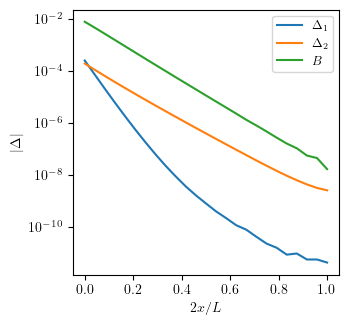

In [832]:
plt.plot(x, d_1 ** 2, label = r'$\Delta_1$')
#plt.plot(x, sum_e(x, a1, a2, c1, c2), label = r'$\Delta_1$')
plt.plot(x, d_2 ** 2, label = r'$\Delta_2$')
#plt.plot(x, sum_e(x, b1, b2, c1, c2), label = r'$\Delta_2$')
plt.plot(x, f_b, label = r'$B$')
#plt.scatter(x, f_b)
#plt.plot(x, fit_f(x, *paramsfb), label = r'$\lambda=$' + '{:.4}'.format(1 / paramsfb[-1]))
#plt.title('Gap asymptotic')
plt.legend()
plt.yscale('log')
plt.xlabel(r'$2x/L$')
plt.ylabel(r'$\left| \Delta \right|$')
plt.savefig('xi_12_cl2.pdf', bbox_inches='tight')
plt.show()

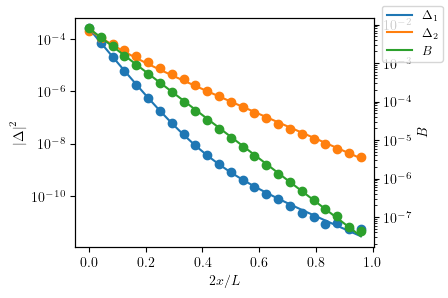

In [724]:
start = 0
fin = -1
fig, ax1 = plt.subplots(figsize=(4.5,3))

ax=plt.gca()
color = next(ax._get_lines.prop_cycler)['color']
ax1.set_xlabel(r'$2x/L$')
ax1.set_ylabel(r'$\left| \Delta \right|^2$')
ax1.set_yscale('log')
ax1.scatter(x[start:fin], d_1[start:fin] ** 2, color=color)
ax1.plot(x[start:fin], sum_e(x[start:fin], a1, a2, c1, c2) ** 2, label = r'$\Delta_1$', color=color)

color = next(ax._get_lines.prop_cycler)['color']
ax1.scatter(x[start:fin], d_2[start:fin] ** 2, color=color)
ax1.plot(x[start:fin], sum_e_m(x[start:fin], b1, b2, c1, c2) ** 2, label = r'$\Delta_2$', color=color)
ax1.tick_params(axis='y')

color = next(ax._get_lines.prop_cycler)['color']
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel(r'$B$')  # we already handled the x-label with ax1
ax2.scatter(x[start:fin], f_b[start:fin], color=color)
ax2.plot(x[start:fin], fit_B(x[start:fin], *opt_B[0]), label = r'$B$', color=color)
ax2.set_yscale('log')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.scatter(x, f_b)
#plt.plot(x, fit_f(x, *paramsfb), label = r'$\lambda=$' + '{:.4}'.format(1 / paramsfb[-1]))
#plt.title('Gap asymptotic')

fig.legend()
plt.savefig('images/' + 'xi_12.pdf', bbox_inches='tight')
plt.show()

In [351]:
paramsd1, errd1 = sp.optimize.curve_fit(fit_f, x, d_1)
paramsd2, errd2 = sp.optimize.curve_fit(fit_f, x, d_2)
paramsfb, errfb = sp.optimize.curve_fit(fit_f, x, f_b)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [1864]:
paramsd1

array([ 0.51848814,  0.53373045, -0.51681769,  0.53373046])

In [1687]:
paramsd2

array([0.00538298, 0.3541864 , 0.13515962, 0.3541848 ])

NameError: name 'paramsd1' is not defined

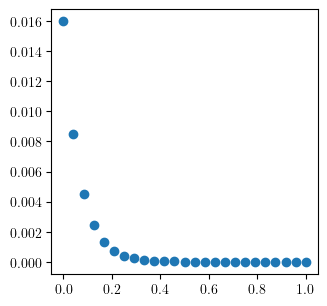

In [608]:
plt.scatter(x, d_1)
plt.plot(x, fit_f(x, *paramsd1), label = r'$\xi_1=$' + '{:.4}'.format(1 / paramsd1[-1]))
plt.scatter(x, d_2)
plt.plot(x, fit_f(x, *paramsd2), label = r'$\xi_2=$' + '{:.4}'.format(1 / paramsd2[-1]))
plt.scatter(x, f_b)
plt.plot(x, fit_f(x, *paramsfb), label = r'$\lambda=$' + '{:.4}'.format(1 / paramsfb[-1]))
plt.title('Field and density asymptotics')
plt.legend()
#plt.savefig('images/' + 'lambda_and_xi.pdf')
plt.show()

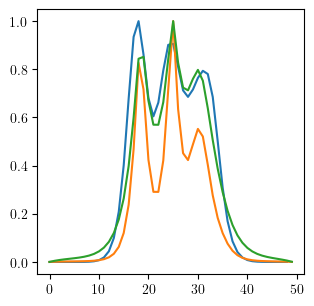

In [ ]:
plt.plot((np.abs(data.B)[30, 7:-7]) / np.max(np.abs(data.B)[30, 7:-7]))
plt.plot(((np.max(np.abs(data.D_1)[29, 7:-7])) - np.abs(data.D_1)[29, 7:-7]) / np.max( np.max(np.abs(data.D_1)[29, 7:-7])- np.abs(data.D_1)[29, 7:-7]))
plt.plot(((np.max(np.abs(data.D_2)[29, 7:-7])) - np.abs(data.D_2)[29, 7:-7]) / np.max( np.max(np.abs(data.D_2)[29, 7:-7])- np.abs(data.D_2)[29, 7:-7]))

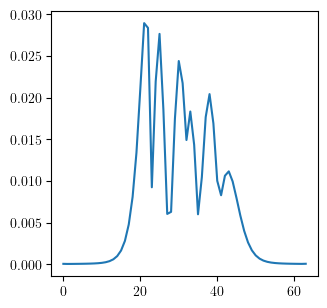

In [609]:
plt.plot(np.sqrt(np.abs(data.Jx) ** 2 + np.abs(data.Jy) ** 2)[28])

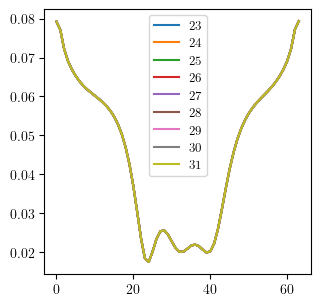

In [610]:
for i in range(23, 32):
    plt.plot(np.abs(data.D_2)[30], label=i)
plt.legend()
plt.show()

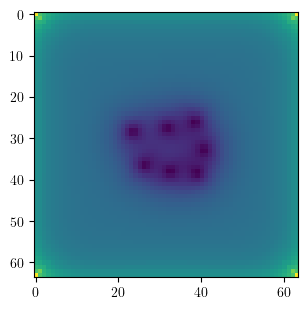

In [611]:
plt.imshow(np.abs(data.D_2))

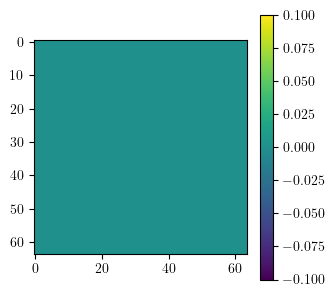

In [612]:
plt.imshow(data.mod/data.hamiltonian.Emax) 
plt.colorbar()

plt.savefig('images/' + file_name + 'mu.pdf')

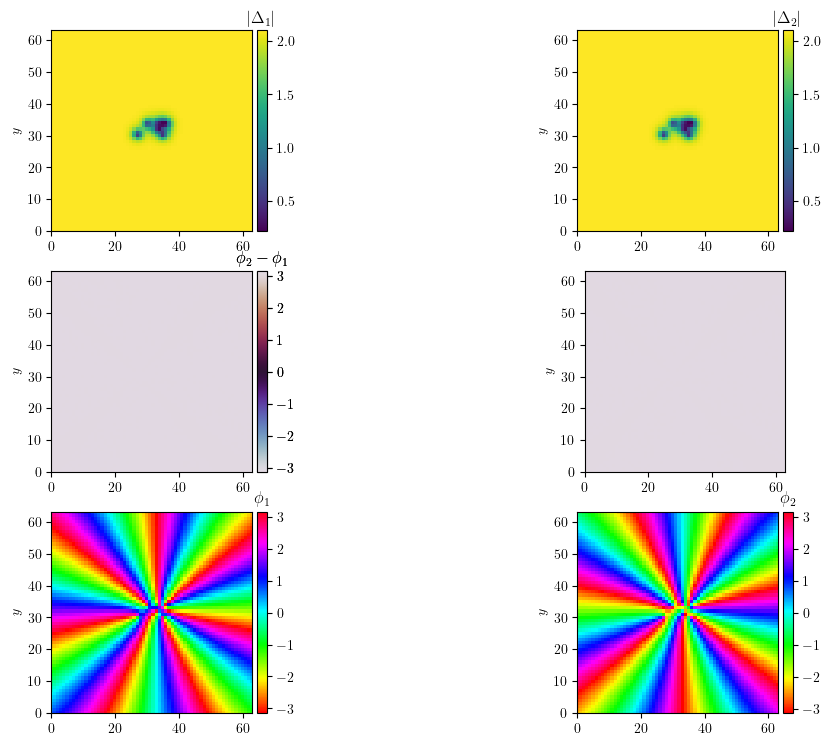

In [789]:
data.plotInitialGuess(save='images/' + file_name+'ig')

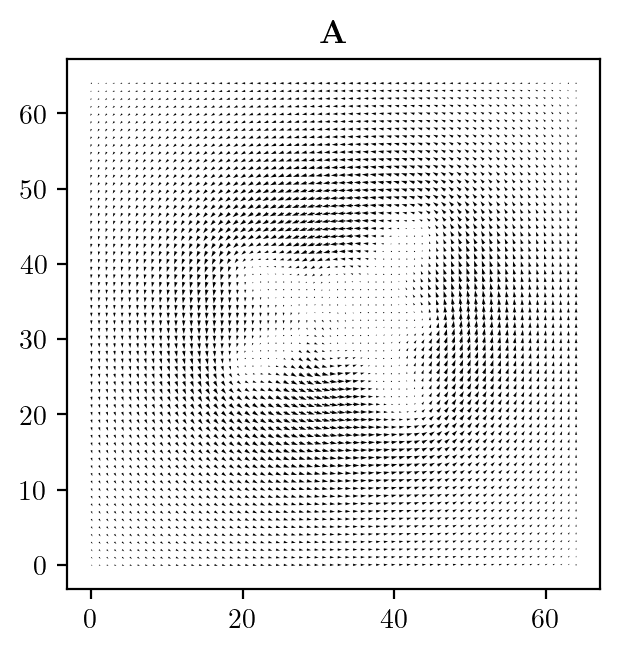

In [790]:
data.plotA()

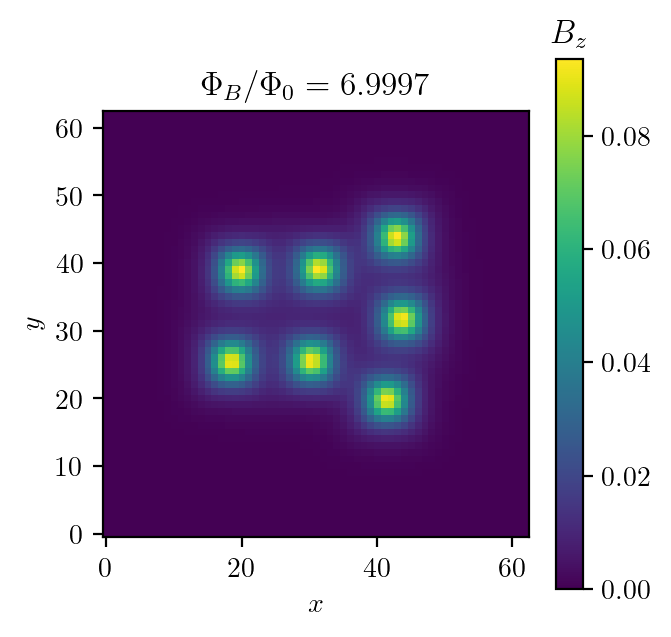

In [791]:
data.plotB(save='images/' + file_name+'B')

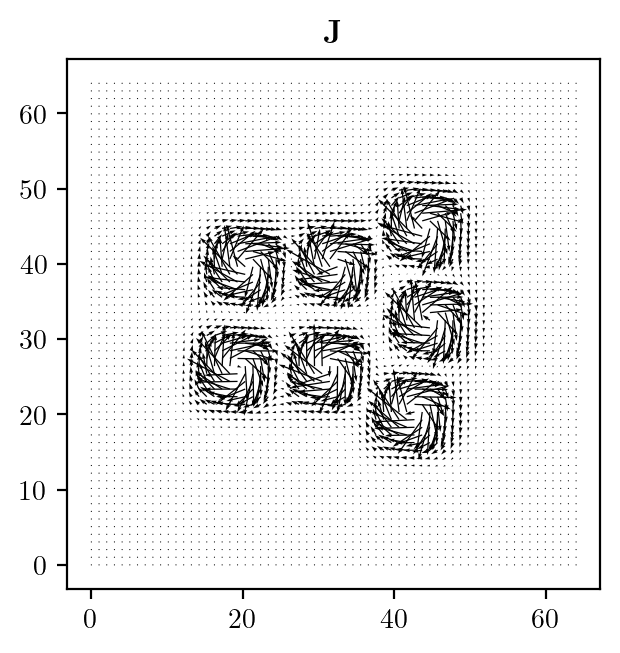

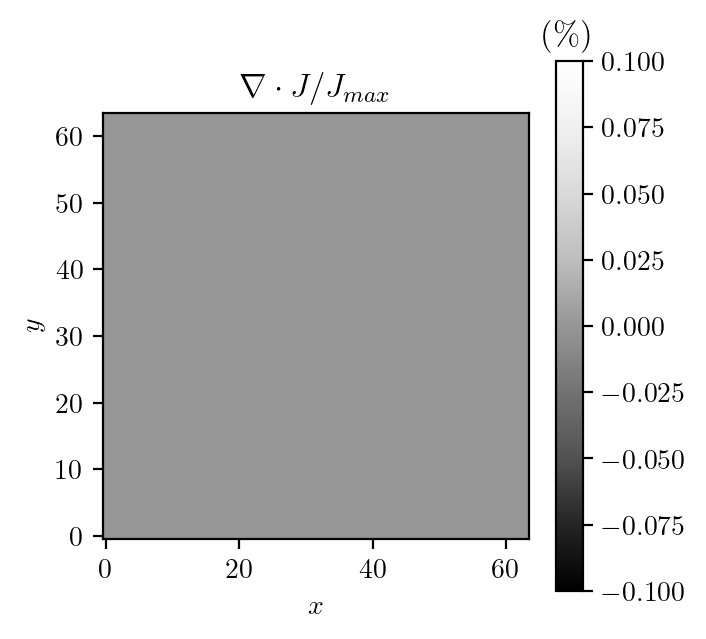

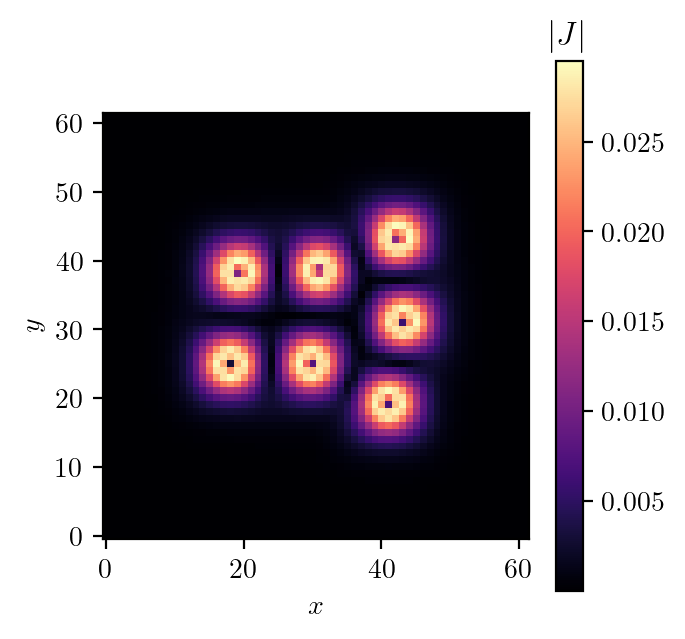

In [792]:
data.plotJ(0.002, save='images/' + file_name+'J')

In [1162]:
data.FreeEnergy

-68667.18881681387

In [327]:
import tensorflow as tf
import networkx as nx

In [328]:
class ScSquareNC:
    def __init__(self, sample_size, mu,
                 init_deltas=None,
                 is_periodic=False,
                 dt=tf.dtypes.complex128):
        self.sample_size = sample_size
        self.N = int(tf.math.reduce_prod(sample_size))
        self.mu = mu
        self.dt = dt
        self.is_periodic = is_periodic
        self._gen_sample()

    def _gen_sample(self):
        g1 = nx.grid_graph([range(el) for el in list(self.sample_size)]
                           + [range(1)],
                           periodic=self.is_periodic)
        for edge in g1.edges(data=True):
            edge[2]['weight'] = 1

        i = 0
        for node in g1:
            g1.add_edge(node, node, weight=-self.mu[0, i])
            i += 1

        g2 = nx.grid_graph([range(el) for el in list(self.sample_size)]
                           + [range(1, 2)],
                           periodic=self.is_periodic)

        for edge in g2.edges(data=True):
            edge[2]['weight'] = -1

        i = 0
        for node in g2:
            g2.add_edge(node, node, weight=self.mu[1, i])
            i += 1

        latt = nx.compose(g1, g2)
        self.sample = latt
        self.hamiltonian = tf.constant(nx.to_numpy_array(self.sample),
                                                         dtype=self.dt)


    @tf.function()
    def exact_diag_coeff(self, n_phases, n_samples, norm, deltas=None):
        N = self.N
        dt = self.dt
        batch_size = tf.constant((n_samples, n_phases))
        (sample_ind,
        phase_ind,
        site_ind) = tf.meshgrid(tf.range(n_samples),
                                tf.range(n_phases),
                                tf.range(N), indexing='ij')
        mult_ham = tf.tensordot(tf.ones(batch_size, dtype=dt),
                                self.hamiltonian, axes=0)
        mult_ind_up = tf.transpose(tf.stack((sample_ind,
                                             phase_ind,
                                             site_ind,
                                             site_ind + N)),
                                   perm=(1, 2, 3, 0))
        mult_ind_down = tf.transpose(tf.stack((sample_ind,
                                               phase_ind,
                                               site_ind + N,
                                               site_ind)),
                                     perm=(1, 2, 3, 0))
        deltas_size = tf.constant((n_samples, n_phases, N))
        mult_ham = tf.tensor_scatter_nd_update(mult_ham, mult_ind_up,
                                               tf.math.conj(deltas))
        mult_ham = tf.tensor_scatter_nd_update(mult_ham, mult_ind_down,
                                               deltas)
        e, v = tf.linalg.eigh(mult_ham)
        return e, v

In [329]:
def df(E, T, Emax, V):
    return -np.exp((E + V) / T * Emax / 4) / T * Emax / 4 / (1 + np.exp((E + V) / T * Emax / 4)) ** 2

In [330]:
def tunneling_im_calc_step_1(data):
    system = ScSquareNC(data.D_1.shape, np.zeros((3, *data.D_1.shape)).reshape((3, -1)))
    deltas = np.array([[data.D_1.flatten(), data.D_2.flatten()]], dtype=np.complex128)
    Emax = data.hamiltonian.Emax
    N = len(data.D_1.flatten())
    e_full, v_full = system.exact_diag_coeff(2, 1, Emax, deltas=deltas)
    v, u = v_full[:, :, N:, N:], v_full[:, :, :N, N:]
    e_1, e_2 = e_full[:, :, N:], e_full[:, :, N:]
    return v, u, e_1, e_2, Emax

def tunneling_im_calc_step_2(u, v, e_1, e_2, T, Emax, V=0):
    dIdV0 = -tf.math.reduce_sum(tf.math.abs(u)[0, 0] ** 2 * df(tf.math.abs(e_1), T, Emax, V)[0, 0] +
                              tf.math.abs(v)[0, 0] ** 2 * df(tf.math.abs(e_2), T, Emax, -V)[0, 0], axis=-1)
    dIdV1 = -tf.math.reduce_sum(tf.math.abs(u)[0, 1] ** 2 * df(tf.math.abs(e_1), T, Emax, V)[0, 1] +
                              tf.math.abs(v)[0, 1] ** 2 * df(tf.math.abs(e_2), T, Emax, -V)[0, 1], axis=-1)

    return (dIdV0 + dIdV1 ).numpy().reshape(64, 64)

In [331]:
v, u, e_1, e_2, Emax = tunneling_im_calc_step_1(data)

In [332]:
4096 ** 0.5

64.0

In [333]:
tun_cond = tunneling_im_calc_step_2(v, u, e_1, e_2, data.hamiltonian.T, Emax, V=0.2)

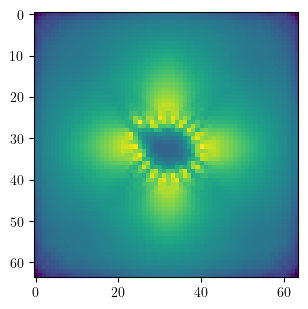

In [334]:
plt.imshow(tun_cond)
#plt.savefig('images/fracU1_v_V=0.pdf')
plt.show()